# Computational Thermofluid Dynamics - Chapter 2

Technical University of Munich, Professur für Thermofluiddynamik - Pr. Polifke

Created: 04/2024 | J. Yao, N. Garcia, G. Varillon

==============================================================================================

# Finite Differences
The 2D steady heat equation reads:
$$
\frac{\partial}{\partial x}(\lambda\frac{\partial T}{\partial x}) + \frac{\partial}{\partial y}(\lambda\frac{\partial T}{\partial y}) = 0
$$

In [2]:
import numpy as np

In [3]:
class SteadyHeat2D:
    def __init__(self, Lx, Ly, dimX, dimY):
        self.l = Lx #lunghezza rettangolo
        self.h = Ly
        self.dimX = dimX #quante divisioni
        self.dimY = dimY

        self.dx = Lx/dimX
        self.dy = Ly/dimY

        self.A = np.identity(self.dimX*self.dimY)
        self.set_inner()
        self.b = np.zeros([self.dimX*self.dimY])
        
    
    # build the linear system
    def set_inner(self):
        for i in range(self.dimX+1, (self.dimX*self.dimY)-self.dimX-1, self.dimX): # the start of each row of inner nodes 
            for j in range(self.dimX-2): # loops through all inner nodes in that row 
                k = i+j
                # builds the matrix like in scicomplab, so each row
                self.A[k][k] = -2 * (1/(self.dx*self.dx) + 1/(self.dy*self.dy)) # central node
                self.A[k][k-1] = 1/(self.dx*self.dx) # side nodes
                self.A[k][k+1] = 1/(self.dx*self.dx)
                self.A[k][k - self.dimX] = 1/(self.dy*self.dy) # upper lower nodes
                self.A[k][k + self.dimX] = 1/(self.dy*self.dy)

    # south
    def set_south(self, bc_type, T_d=0.0, q=0.0, alpha = 0.0, T_inf=0.0):
        if (bc_type=="d"):
            try: 
                self.b[-self.dimX:] = T_d
                for i in range(self.dimX):
                    ii = (self.dimX*self.dimY) - i - 1
                    self.A[ii][ii] = 1
            except:
                print("no T_d value for source boundary type")
        elif (bc_type=="n"):
            try:
                for i in range(self.dimX):
                    ii = (self.dimX*self.dimY)-i-1
                    self.b[ii] = q
                    self.A[ii][ii] = -4/(2*self.dimY)
                    self.A[ii][ii-self.dimX] = 3/(2*self.dimY)
                    self.A[ii][ii-(2*self.dimX)] = 1/(2*self.dimY)
            except:
                print("no q value for flux boundary type")
        elif (bc_type=="r"):
            try:
                for i in range(self.dimX):
                    ii = (self.dimX*self.dimY)-i-1
                    self.b[ii] = alpha * T_inf
                    self.A[ii][ii] = alpha + 3/(2*self.dimY)
                    self.A[ii][ii-self.dimX] = -4/(2*self.dimY)
                    self.A[ii][ii-(2*self.dimX)] = 1/(2*self.dimY)
            except:
                print("no alpha or T_inf value for conjugate boundary type")
        else:
            raise TypeError("Unknown boundary condition: {0:s}".format(bc_type))


    # north
    def set_north(self, bc_type, T_d=0.0, q=0.0, alpha = 0.0, T_inf=0.0):
        if (bc_type=="d"):
            try: 
                self.b[:self.dimX] = T_d
                for i in range(self.dimX):
                    ii = (self.dimX*self.dimY) - i - 1
                    self.A[ii][ii] = 1
            except:
                print("no T_d value for source boundary type")
        elif (bc_type=="n"):
            try:
                for i in range(self.dimX):
                    ii = i
                    self.b[ii] = q
                    self.A[ii][ii] = -4/(2*self.dimY)
                    self.A[ii][ii+self.dimX] = 3/(2*self.dimY)
                    self.A[ii][ii+(2*self.dimX)] = 1/(2*self.dimY)
            except:
                print("no q value for flux boundary type")
        elif (bc_type=="r"):
            try:
                for i in range(self.dimX):
                    ii = i
                    self.b[ii] = alpha * T_inf
                    self.A[ii][ii] = alpha + 3/(2*self.dimY)
                    self.A[ii][ii+self.dimX] = -4/(2*self.dimY)
                    self.A[ii][ii+(2*self.dimX)] = 1/(2*self.dimY)
            except:
                print("no alpha or T_inf value for conjugate boundary type")
        else:
            raise TypeError("Unknown boundary condition: {0:s}".format(bc_type))


    # west
    def set_west(self, bc_type, T_d=0.0, q=0.0, alpha = 0.0, T_inf=0.0):
        if (bc_type=="d"):
            try: 
                for i in range(self.dimY):
                    ii = i * self.dimX
                    self.b[ii] = T_d
                    self.A[ii][ii] = 1
            except:
                print("no T_d value for source boundary type")
        elif (bc_type=="n"):
            try:
                for i in range(self.dimY):
                    ii = i * self.dimX
                    self.b[ii] = q
                    self.A[ii][ii] = -4/(2*self.dimX)
                    self.A[ii][ii+1] = 3/(2*self.dimX)
                    self.A[ii][ii+2] = 1/(2*self.dimX)
            except:
                print("no q value for flux boundary type")
        elif (bc_type=="r"):
            try:
                for i in range(self.dimY):
                    ii = i * self.dimX
                    self.b[ii] = alpha * T_inf
                    self.A[ii][ii] = alpha + 3/(2*self.dimY)
                    self.A[ii][ii+1] = -4/(2*self.dimY)
                    self.A[ii][ii+2] = 1/(2*self.dimY)
            except:
                print("no alpha or T_inf value for conjugate boundary type")
        else:
            raise TypeError("Unknown boundary condition: {0:s}".format(bc_type))


# east
    def set_east(self, bc_type, T_d=0.0, q=0.0, alpha = 0.0, T_inf=0.0):
        if (bc_type=="d"):
            try: 
                for i in range(self.dimY):
                    ii = i * self.dimX + self.dimX -1
                    self.b[ii] = T_d
                    self.A[ii][ii] = 1
            except:
                print("no T_d value for source boundary type")
        elif (bc_type=="n"):
            try:
                for i in range(self.dimY):
                    ii = i * self.dimX + self.dimX -1
                    self.b[ii] = q
                    self.A[ii][ii] = -4/(2*self.dimX)
                    self.A[ii][ii-1] = 3/(2*self.dimX)
                    self.A[ii][ii-2] = 1/(2*self.dimX)
            except:
                print("no q value for flux boundary type")
        elif (bc_type=="r"):
            try:
                for i in range(self.dimY):
                    ii = i * self.dimX + self.dimX -1
                    self.b[ii] = alpha * T_inf
                    self.A[ii][ii] = alpha + 3/(2*self.dimY)
                    self.A[ii][ii-1] = -4/(2*self.dimY)
                    self.A[ii][ii-2] = 1/(2*self.dimY)
            except:
                print("no alpha or T_inf value for conjugate boundary type")
        else:
            raise TypeError("Unknown boundary condition: {0:s}".format(bc_type))
       
       

    # solve the linear system
    def solve(self):
        return np.linalg.solve(self.A, self.b)


In [4]:
# Test
Lx = 1
Ly = 1
dimX = 50
dimY = 50
bc_type = "n"

heat = SteadyHeat2D(Lx, Ly, dimX, dimY)

heat.set_south("d", T_d=5)
heat.set_west("d", T_d=5)
heat.set_north("n", q=10)
heat.set_east("d", T_d=5)

# heat.set_north("d", T_d=0)A
# heat.set_south("d", T_d=0)
# heat.set_east("d", T_d=0)
# heat.set_west("d", T_d=0)


T = heat.solve()
T.reshape((dimX, dimY))

array([[-2.45000000e+02, -7.18750415e+02, -1.09589950e+03, ...,
        -1.09589950e+03, -7.18750415e+02,  4.80000000e+00],
       [ 5.00000000e+00, -4.95948480e+02, -8.82887285e+02, ...,
        -8.82887285e+02, -4.95948480e+02,  5.00000000e+00],
       [ 5.00000000e+00, -3.87156219e+02, -7.34936147e+02, ...,
        -7.34936147e+02, -3.87156219e+02,  5.00000000e+00],
       ...,
       [ 5.00000000e+00,  2.04136313e+00, -9.04909120e-01, ...,
        -9.04909120e-01,  2.04136313e+00,  5.00000000e+00],
       [ 5.00000000e+00,  3.52376544e+00,  2.05369861e+00, ...,
         2.05369861e+00,  3.52376544e+00,  5.00000000e+00],
       [ 5.00000000e+00,  5.00000000e+00,  5.00000000e+00, ...,
         5.00000000e+00,  5.00000000e+00,  5.00000000e+00]])

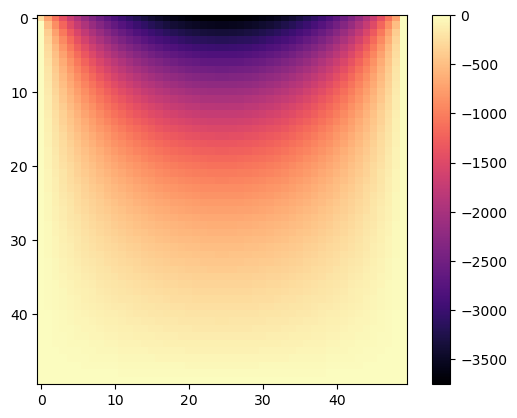

In [5]:
import matplotlib.pyplot as plt

matrix = T.reshape((dimX, dimY))
plt.imshow(matrix, cmap='magma')
plt.colorbar()
plt.show()

In [ ]:
from scipy.sparse import dia_matrix

diag = np.ones([5])
ldiag = np.ones([5])
offset = 

A = dia_matrix()